# Principal Component Analysis + Cluster Model (Ames, Iowa Housing)

## Loading the Data and Initial Cleanup & Transformation

In [1]:
!pip install tqdm --quiet

In [2]:
cd ..

/home/jovyan/CSX_450_2_Project_Final


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import lib.visuals as vs

%matplotlib inline

In [4]:
run src/load_data.py

In [5]:
whos DataFrame

Variable                     Type         Data/Info
---------------------------------------------------
housing_df                   DataFrame         MSSubClass MSZoning <...>n[2903 rows x 80 columns]
housing_ouliers_removed_df   DataFrame         MSSubClass MSZoning <...>n[2889 rows x 80 columns]
numeric_df                   DataFrame          LotFrontage  LotAre<...>n[2903 rows x 23 columns]
numeric_final_df             DataFrame          LotFrontage   LotAr<...>n[2889 rows x 23 columns]
numeric_log_df               DataFrame          LotFrontage    LotA<...>n[2903 rows x 23 columns]
numeric_log_sc_df            DataFrame          LotFrontage   LotAr<...>n[2903 rows x 23 columns]
numeric_sc_df                DataFrame          LotFrontage   LotAr<...>n[2903 rows x 23 columns]


## One-hot Encoding of Categoraical Features

In [6]:
categorial_df = housing_df.select_dtypes(include=['category']).copy()

In [7]:
categorial_final_df = pd.get_dummies(categorial_df, prefix_sep='_',)

In [8]:
final_features_df = pd.merge(categorial_final_df, numeric_log_sc_df, left_index=True, right_index=True)

## Using Top Features - selected by a Decision Tree

In [9]:
features_selected = ['GarageArea','LotArea','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1',
                     '1stFlrSF','YearRemodAdd','YearBuilt','GarageYrBlt','GrLivArea']

## Looking at 5 samples

In [10]:
np.random.seed(13)

sample_df = final_features_df.sample(5)
sample_df[features_selected]

GarageArea   LotArea  TotalBsmtSF  BsmtUnfSF  BsmtFinSF1  1stFlrSF  \
Id                                                                         
1919    1.020477 -0.238916     0.004280   0.470676   -0.339881 -0.271195   
1692    2.636995  0.445981     2.005628   0.163244    1.891801  2.020270   
1763    0.816090  0.110456    -0.186541   0.935239   -0.972483 -0.415378   
2603    0.816090  0.087334     0.058800   1.181184   -0.972483 -0.456572   
513     1.006542 -0.057877     0.140580   0.486617   -0.223464 -0.116715   

      YearRemodAdd  YearBuilt  GarageYrBlt  GrLivArea  
Id                                                     
1919     -1.011868  -0.268905     0.659170  -0.881299  
1692      1.097475   1.187125     1.190692   2.295215  
1763      0.761898   0.955484     0.904488   1.560039  
2603     -1.635083  -2.022760    -1.753123   0.519696  
513       1.001596   1.120942     1.108919   0.937815

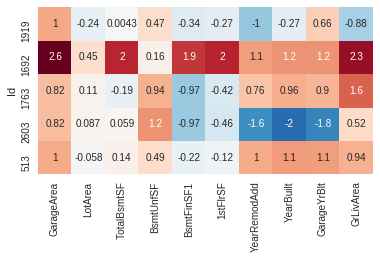

In [11]:
sns.heatmap(sample_df[features_selected], annot=True, cbar=False, square=True)

In [12]:
final_features_df[features_selected].mean()

GarageArea      1.070067e-16
LotArea        -2.634055e-17
TotalBsmtSF     1.269414e-16
BsmtUnfSF       8.210985e-17
BsmtFinSF1     -2.847647e-16
1stFlrSF        8.687122e-17
YearRemodAdd    4.489080e-15
YearBuilt      -2.689623e-15
GarageYrBlt    -1.343967e-13
GrLivArea       2.234214e-16
dtype: float64

In [13]:
final_features_df[features_selected].iloc[[513, 1763, 1692, 1919 , 2603]]

GarageArea   LotArea  TotalBsmtSF  BsmtUnfSF  BsmtFinSF1  1stFlrSF  \
Id                                                                         
516     0.946154 -0.143632    -0.643149   0.477508   -0.972483 -0.958635   
1780    0.054283  0.061163     1.074240   2.135361   -0.910980  0.967226   
1707    1.721897  0.442678     1.705767   2.832206   -0.972483  1.657240   
1940   -1.023396  0.402659    -0.279680  -0.016660   -0.144389 -0.593030   
2630   -0.856170 -0.397721     0.224632  -0.431124    0.743012 -0.021452   

      YearRemodAdd  YearBuilt  GarageYrBlt  GrLivArea  
Id                                                     
516       1.145415   1.220217     1.231578   0.182823  
1780      1.049536   1.154034     1.149806   0.071853  
1707      1.049536   1.154034     1.149806   0.602924  
1940      0.761898  -0.500546    -0.894510  -1.129000  
2630     -1.107747  -0.335088    -0.690079  -0.689083

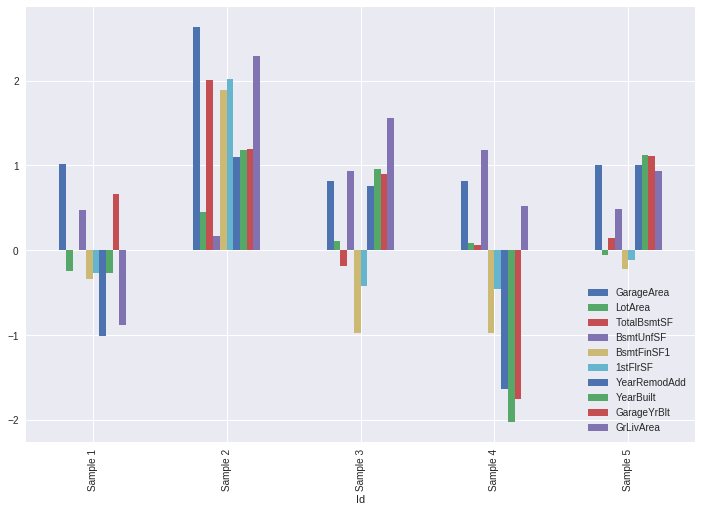

In [14]:
sample_df[features_selected].plot(kind='bar', figsize=(12,8))
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

## Principal Component Analysis (PCA)

In [15]:
pca = PCA()
pca.fit(final_features_df[features_selected])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## The Bend
### Looking at "the bend" - we can keep 3 components that explain over 0.7 of variance.

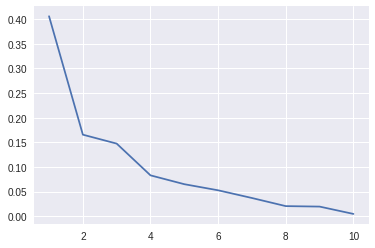

In [16]:
plt.plot( range(1, 11), pca.explained_variance_ratio_)

In [17]:
final_features_df[features_selected].cov()

GarageArea   LotArea  TotalBsmtSF  BsmtUnfSF  BsmtFinSF1  \
GarageArea      1.000000  0.212268     0.487149   0.165771    0.309113   
LotArea         0.212268  1.000000     0.257859   0.025874    0.192838   
TotalBsmtSF     0.487149  0.257859     1.000000   0.411135    0.536410   
BsmtUnfSF       0.165771  0.025874     0.411135   1.000000   -0.477927   
BsmtFinSF1      0.309113  0.192838     0.536410  -0.477927    1.000000   
1stFlrSF        0.495034  0.323755     0.812173   0.300845    0.462588   
YearRemodAdd    0.376160  0.021283     0.299534   0.163777    0.154231   
YearBuilt       0.481206  0.024545     0.410009   0.126843    0.283748   
GarageYrBlt     0.479674 -0.007263     0.338972   0.164045    0.194240   
GrLivArea       0.485113  0.278881     0.451080   0.239043    0.211665   

              1stFlrSF  YearRemodAdd  YearBuilt  GarageYrBlt  GrLivArea  
GarageArea    0.495034      0.376160   0.481206     0.479674   0.485113  
LotArea       0.323755      0.021283   0.024545    -0.007263   0.278881  
TotalBsmtSF   0.812173      0.299534   0.410009     0.338972   0.451080  
BsmtUnfSF     0.300845      0.163777   0.126843     0.164045   0.239043  
BsmtFinSF1    0.462588      0.154231   0.283748     0.194240   0.211665  
1stFlrSF      1.000000      0.245053   0.317172     0.260505   0.559466  
YearRemodAdd  0.245053      1.000000   0.609377     0.630351   0.317204  
YearBuilt     0.317172      0.609377   1.000000     0.796936   0.243634  
GarageYrBlt   0.260505      0.630351   0.796936     1.000000   0.268628  
GrLivArea     0.559466      0.317204   0.243634     0.268628   1.000000

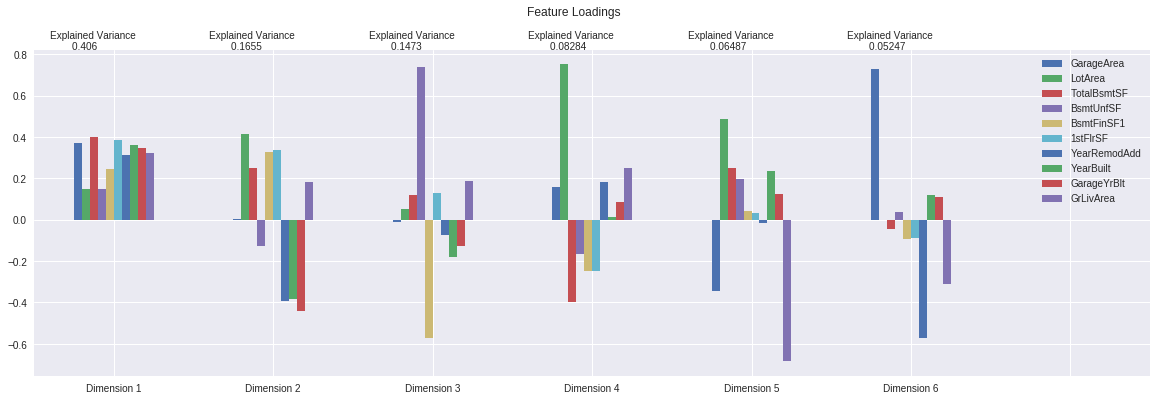

In [18]:
flplot = vs.FeatureLoadingsPlot(final_features_df[features_selected], pca, 6)
flplot.display_segments()

## Loadings' Analysis
### Dimension 1 (Desireability)
Features selected for this analysis are all aspects of either size or year-built for the properties. They all are moving in the same direction, which makes senese. Generally speaking, the larger, newer properties are more expensive.

### Dimension 2 (Newness)
From this dimension we can see that once again as expected, the year's built aspects are all moving in the same direction. These include Year Built, Year Remodeled and Garage Year Built.

### Dimension 3 (Basement Finish)
The square footage of the basement is broken down into finished and unfinished, and if one goes up the other goes down. And that is what this dimension shows.

### Looking at different number of components: 2-3-4

In [19]:
pca_2 = PCA(n_components=2)
pca_2.fit(final_features_df[features_selected])
pca_3 = PCA(n_components=3)
pca_3.fit(final_features_df[features_selected])
pca_4 = PCA(n_components=4)
pca_4.fit(final_features_df[features_selected])

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
housing_pca_2_df = pd.DataFrame(pca_2.transform(final_features_df[features_selected]), 
                               columns=['Dimension 1', 'Dimension 2'])
housing_pca_3_df = pd.DataFrame(pca_3.transform(final_features_df[features_selected]), 
                               columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
housing_pca_4_df = pd.DataFrame(pca_4.transform(final_features_df[features_selected]), 
                               columns=['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'])
sample_pca_2_df = pd.DataFrame(pca_2.transform(sample_df[features_selected]), 
                             columns=['Dimension 1', 'Dimension 2'])
sample_pca_3_df = pd.DataFrame(pca_3.transform(sample_df[features_selected]), 
                             columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
sample_pca_4_df = pd.DataFrame(pca_4.transform(sample_df[features_selected]), 
                             columns=['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'])

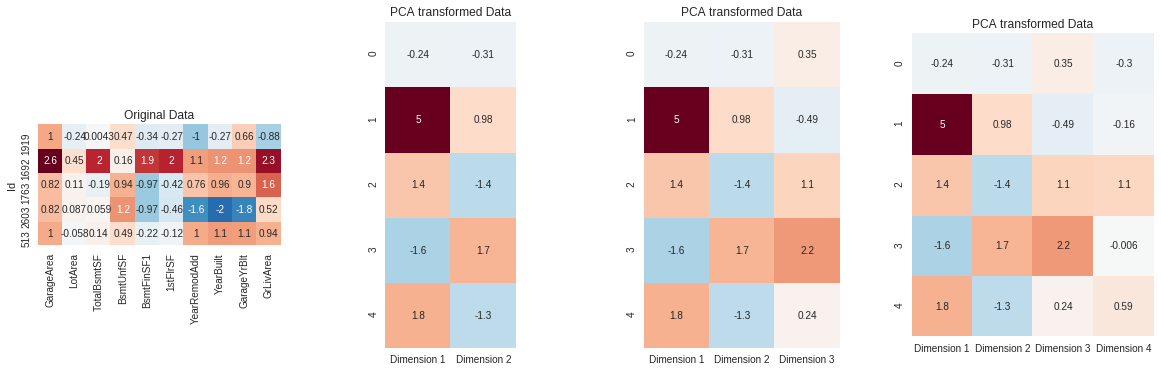

In [21]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(141)
plt.title("Original Data")
sns.heatmap(sample_df[features_selected], annot=True, cbar=False, square=True)
fig.add_subplot(142)
plt.title("PCA transformed Data")
sns.heatmap(sample_pca_2_df, annot=True, cbar=False, square=True)
fig.add_subplot(143)
plt.title("PCA transformed Data")
sns.heatmap(sample_pca_3_df, annot=True, cbar=False, square=True)
fig.add_subplot(144)
plt.title("PCA transformed Data")
sns.heatmap(sample_pca_4_df, annot=True, cbar=False, square=True)

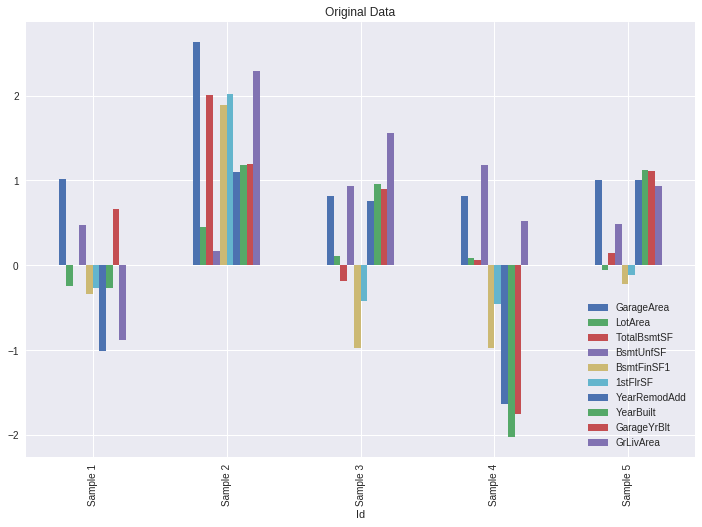

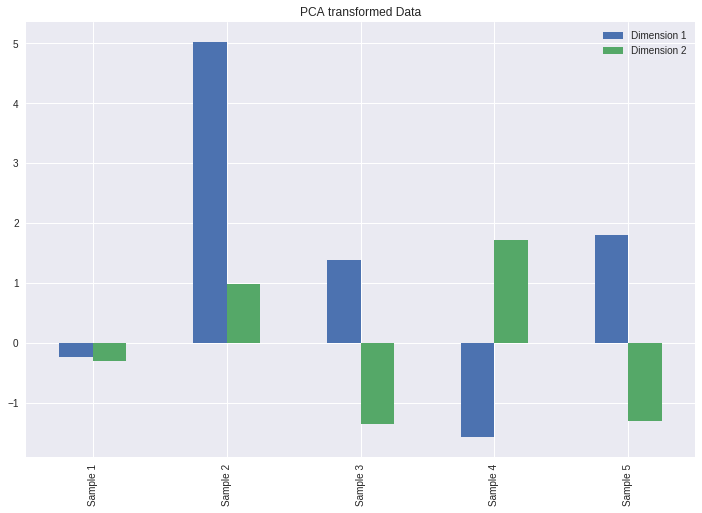

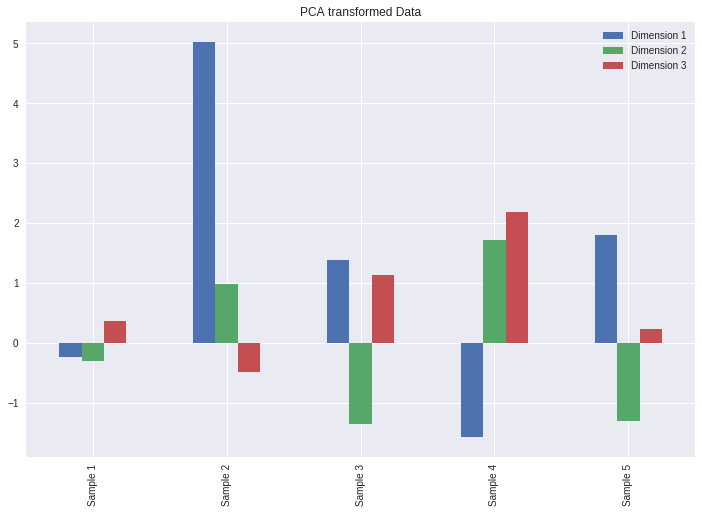

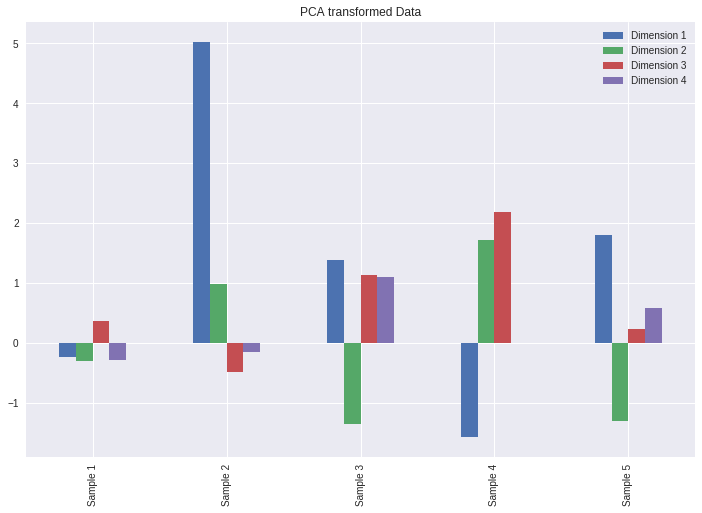

In [22]:
sample_df[features_selected].plot(kind='bar', figsize=(12,8))
plt.title("Original Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

sample_pca_2_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

sample_pca_3_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

sample_pca_4_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

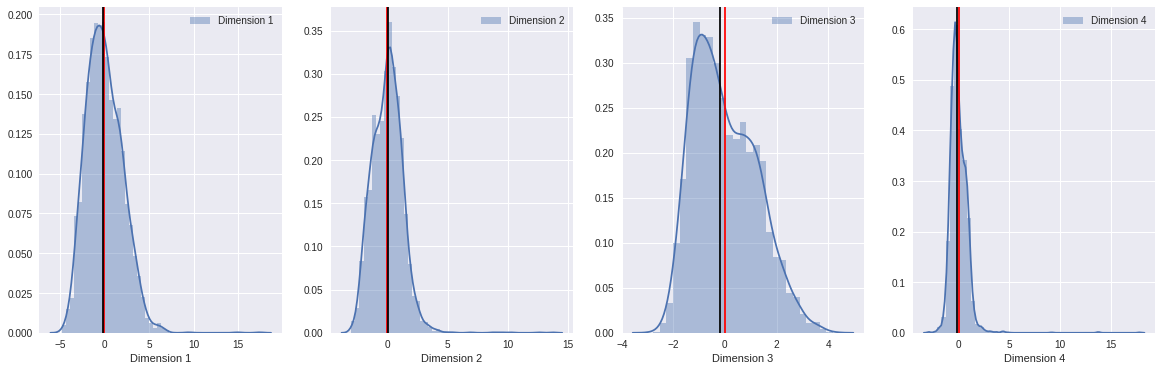

In [23]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(housing_pca_4_df.columns):
    fig.add_subplot(141+i)
    sns.distplot(housing_pca_4_df[col], label=col)
    plt.axvline(housing_pca_4_df[col].mean(), c='red')
    plt.axvline(housing_pca_4_df[col].median(), c='black')
    plt.legend()

## Cluster Model

 25%|██▌       | 1/4 [00:00<00:00,  4.15it/s]

For n_clusters = 2 the silhouette score is 0.4377043444633193.


 50%|█████     | 2/4 [00:00<00:00,  3.93it/s]

For n_clusters = 3 the silhouette score is 0.40336106487963336.


 75%|███████▌  | 3/4 [00:00<00:00,  3.80it/s]

For n_clusters = 4 the silhouette score is 0.36816361797799746.


100%|██████████| 4/4 [00:01<00:00,  3.70it/s]

For n_clusters = 5 the silhouette score is 0.36840020666026496.


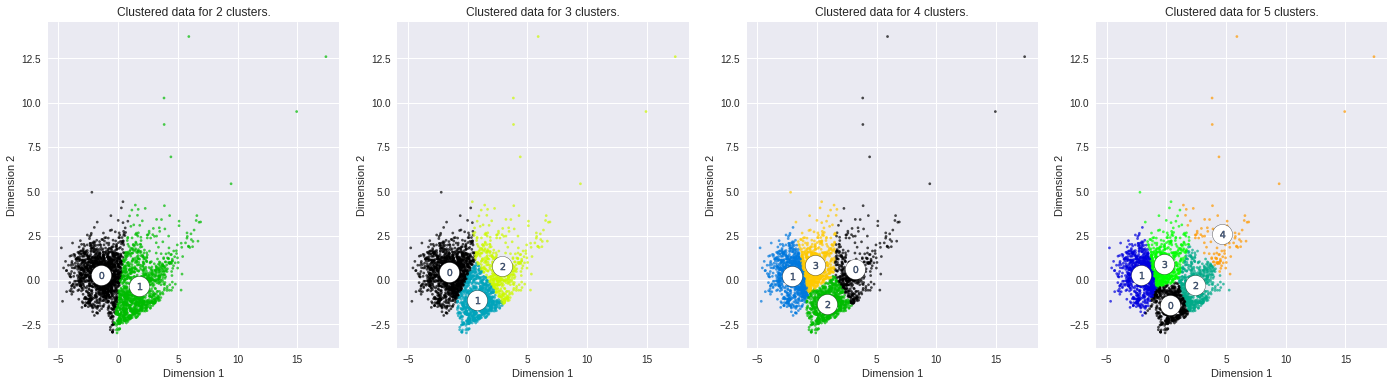

In [24]:
pca_2_clusters = vs.Clusters(housing_pca_2_df, range(2,6))
pca_2_clusters.cluster_plots(1,2)

 25%|██▌       | 1/4 [00:00<00:00,  4.15it/s]

For n_clusters = 2 the silhouette score is 0.3515066417101903.


 50%|█████     | 2/4 [00:00<00:00,  3.89it/s]

For n_clusters = 3 the silhouette score is 0.3359049690053084.


 75%|███████▌  | 3/4 [00:00<00:00,  3.77it/s]

For n_clusters = 4 the silhouette score is 0.3054261148108031.


100%|██████████| 4/4 [00:01<00:00,  3.41it/s]

For n_clusters = 5 the silhouette score is 0.2866951886870725.


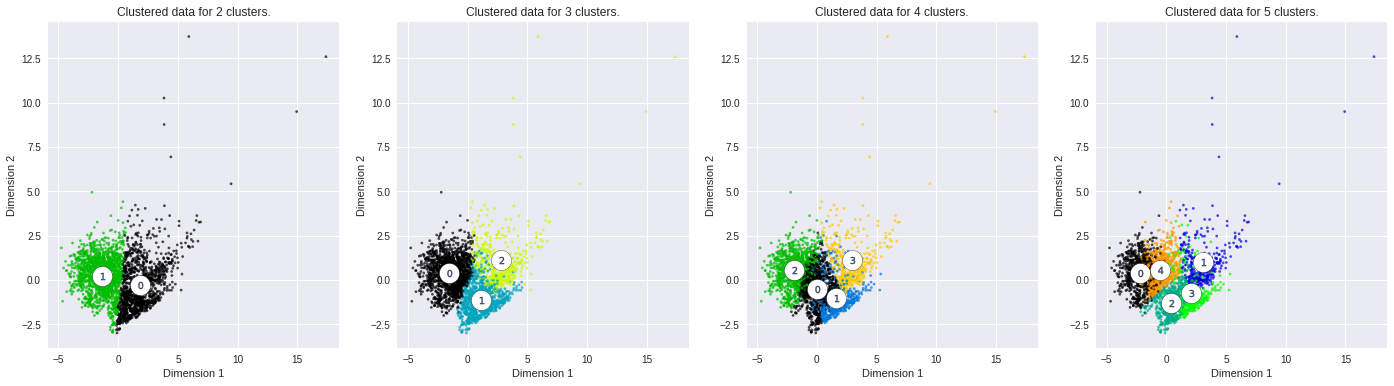

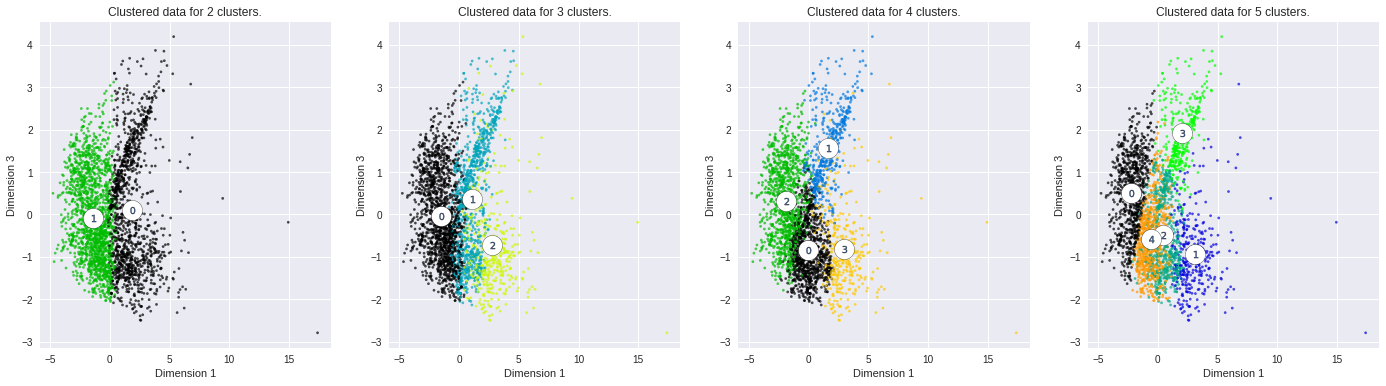

In [25]:
pca_3_clusters = vs.Clusters(housing_pca_3_df, range(2,6))
pca_3_clusters.cluster_plots(1,2)
pca_3_clusters.cluster_plots(1,3)

 25%|██▌       | 1/4 [00:00<00:00,  4.14it/s]

For n_clusters = 2 the silhouette score is 0.3269175540133428.


 50%|█████     | 2/4 [00:00<00:00,  3.87it/s]

For n_clusters = 3 the silhouette score is 0.30935284265283913.


 75%|███████▌  | 3/4 [00:00<00:00,  3.70it/s]

For n_clusters = 4 the silhouette score is 0.27745337700194644.


100%|██████████| 4/4 [00:01<00:00,  3.64it/s]

For n_clusters = 5 the silhouette score is 0.25773051404972075.


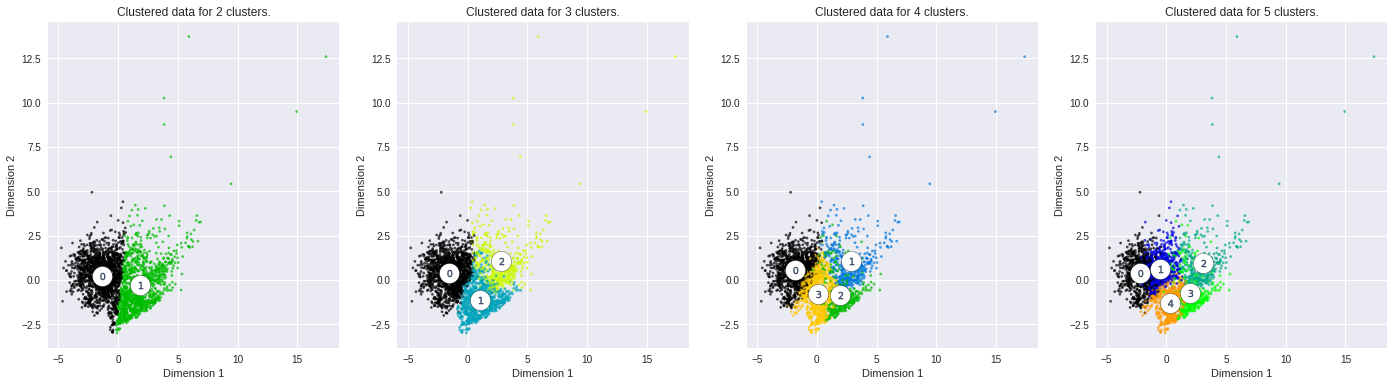

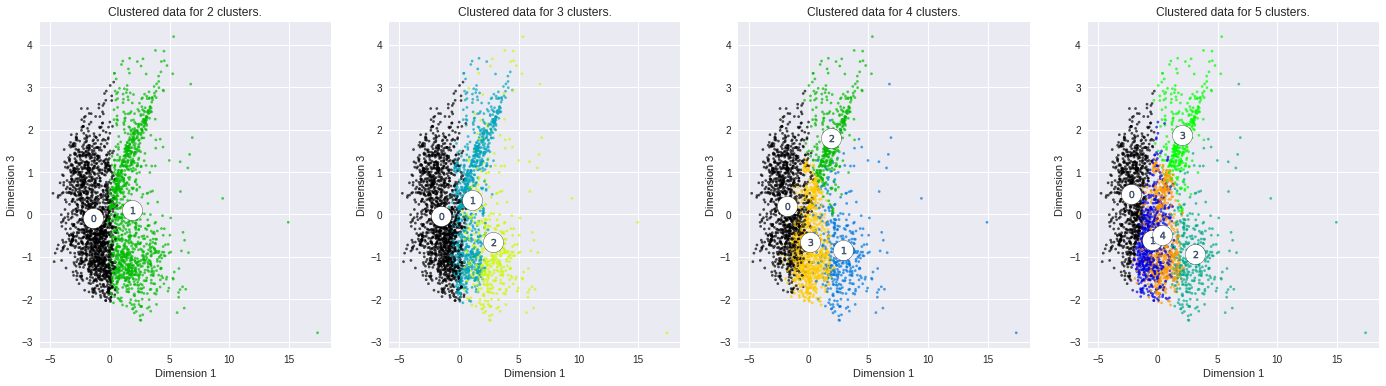

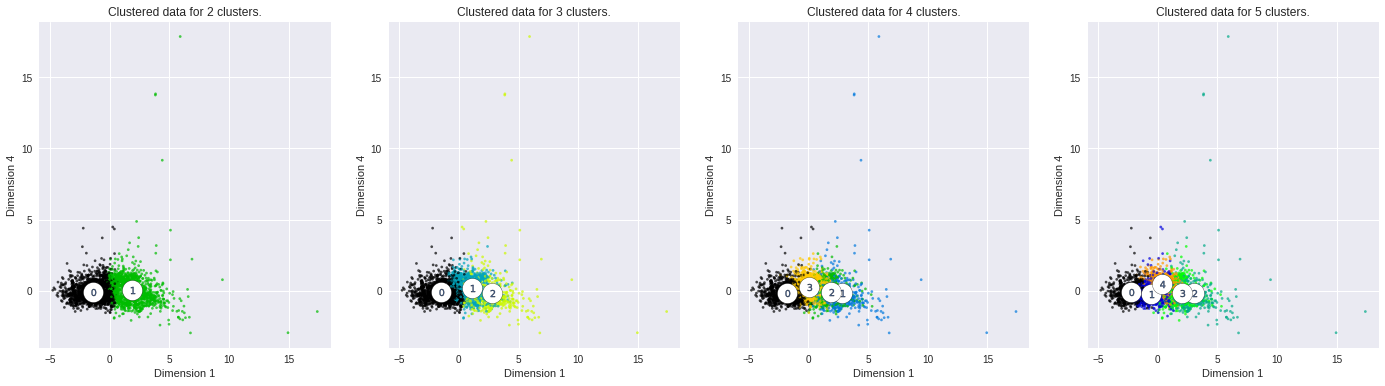

In [26]:
pca_4_clusters = vs.Clusters(housing_pca_4_df, range(2,6))
pca_4_clusters.cluster_plots(1,2)
pca_4_clusters.cluster_plots(1,3)
pca_4_clusters.cluster_plots(1,4)

## Observation
From the above plots and silhouette numbers we can see great results can be achieved when using 4 clusters.

Text(0.5,1,'Cluster Centers')

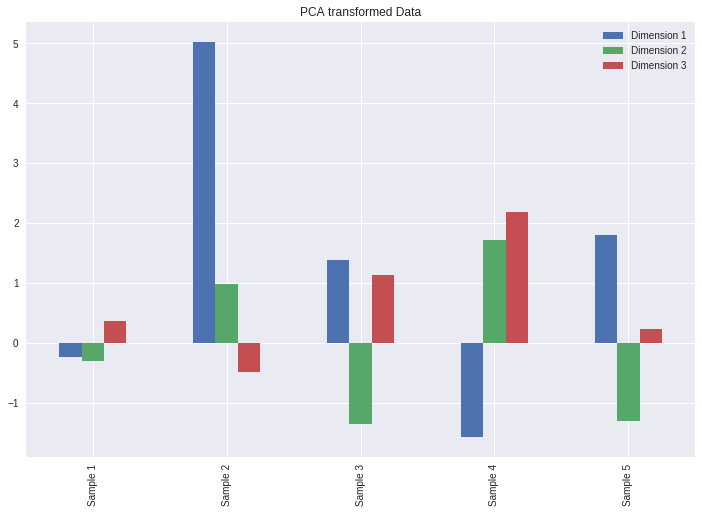

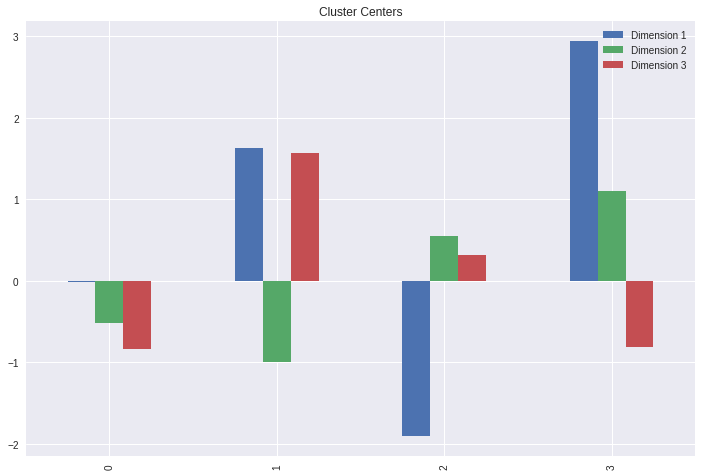

In [27]:
sample_pca_3_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

pca_3_clusters.cluster_centers[4].plot(kind='bar', figsize=(12,8))
plt.title("Cluster Centers")

Text(0.5,1,'Cluster Centers')

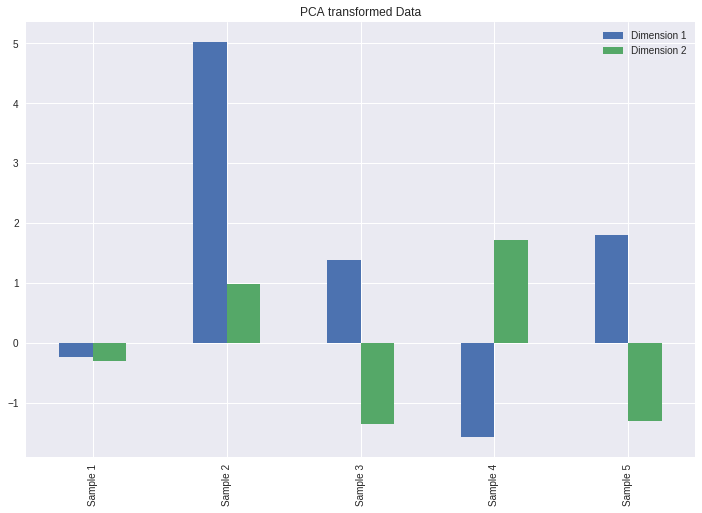

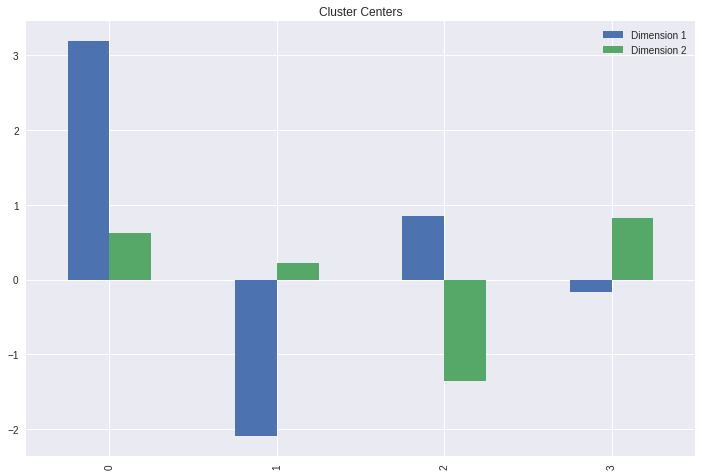

In [28]:
sample_pca_2_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

pca_2_clusters.cluster_centers[4].plot(kind='bar', figsize=(12,8))
plt.title("Cluster Centers")

Text(0.5,1,'Cluster Centers')

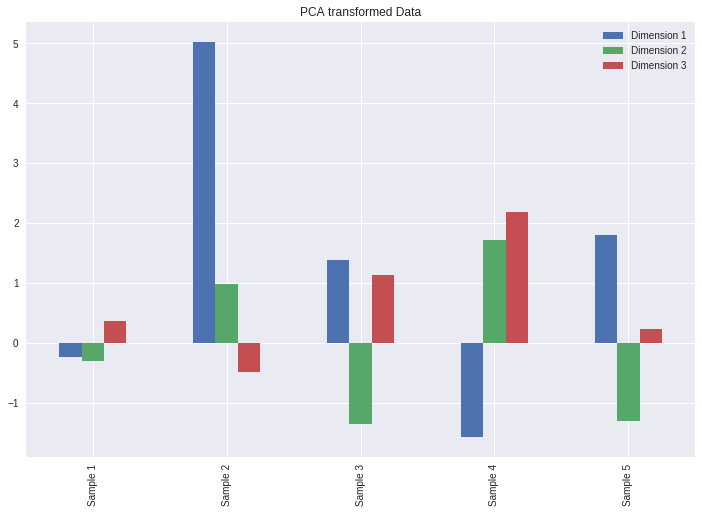

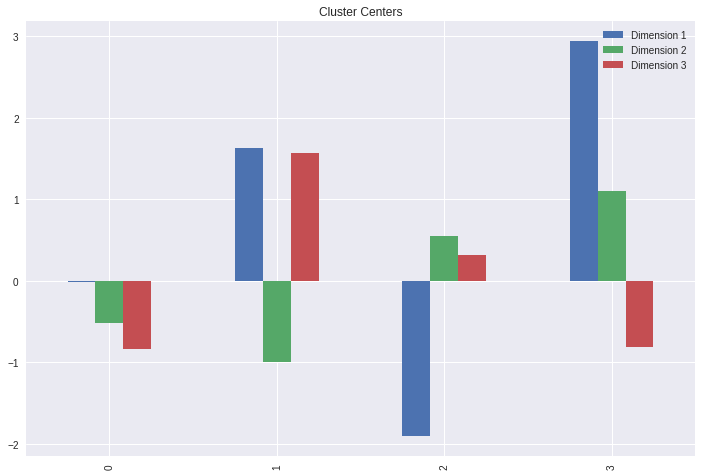

In [29]:
sample_pca_3_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

pca_3_clusters.cluster_centers[4].plot(kind='bar', figsize=(12,8))
plt.title("Cluster Centers")

In [30]:
inv_transform_clusters = pd.DataFrame(pca_3.inverse_transform(pca_3_clusters.cluster_centers[2]), columns=final_features_df[features_selected].columns)

Text(0.5,1,'Cluster Centers')

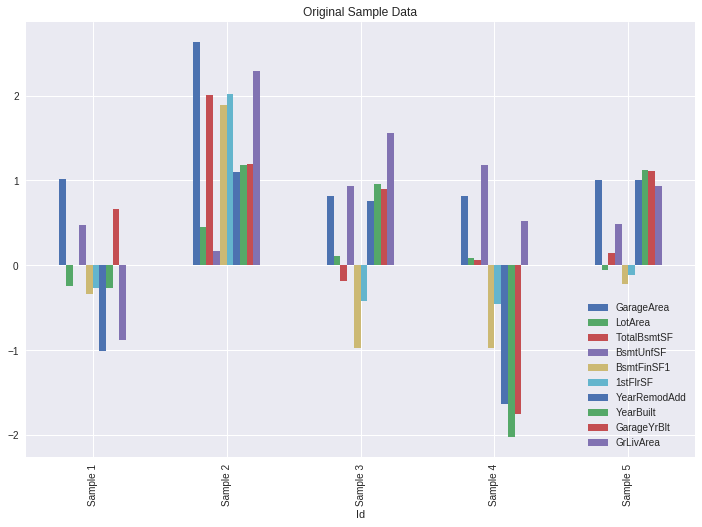

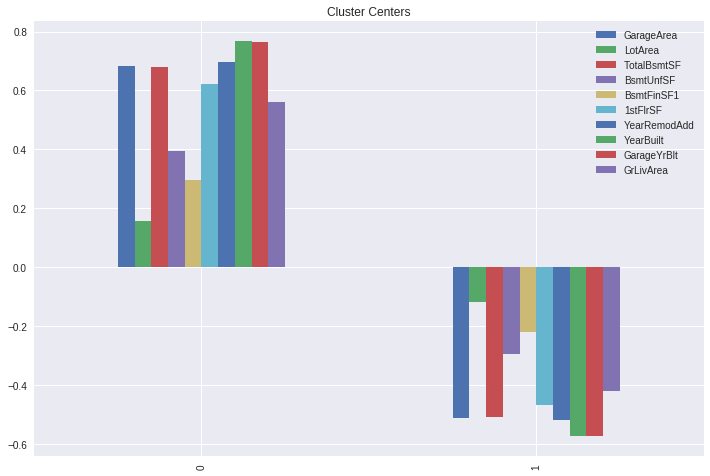

In [31]:
sample_df[features_selected].plot(kind='bar', figsize=(12,8))
plt.title("Original Sample Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

inv_transform_clusters.plot(kind='bar', figsize=(12,8))
plt.title("Cluster Centers")